Graph creation.

In [ ]:
pip install pandas matplotlib seaborn

              x             y             z     Magnitude      Row_Mean  Mood  \
0 -3.219647e-17 -3.108624e-17  4.884981e-17 -1.909584e-16  2.220446e-18     2   
1  1.915135e-17  1.776357e-17  2.442491e-17 -2.176037e-16 -1.013079e-17     0   
2 -2.109424e-17 -3.219647e-17 -8.437695e-17  3.863576e-16 -1.221245e-17     1   
3  2.747802e-17 -2.886580e-17 -8.881784e-18 -8.382184e-16 -2.914335e-18     2   
4  1.332268e-17  2.636780e-17  3.330669e-17 -7.938095e-17 -1.776357e-17     2   

   Predicted_Mood  Disease Predicted_Disease  
0               1        0          Epilepsy  
1               0        3       Parkinson's  
2               0        1          Epilepsy  
3               3        0       Alzheimer's  
4               0        0       Parkinson's  
Adding 'Healthy' category for comparison.


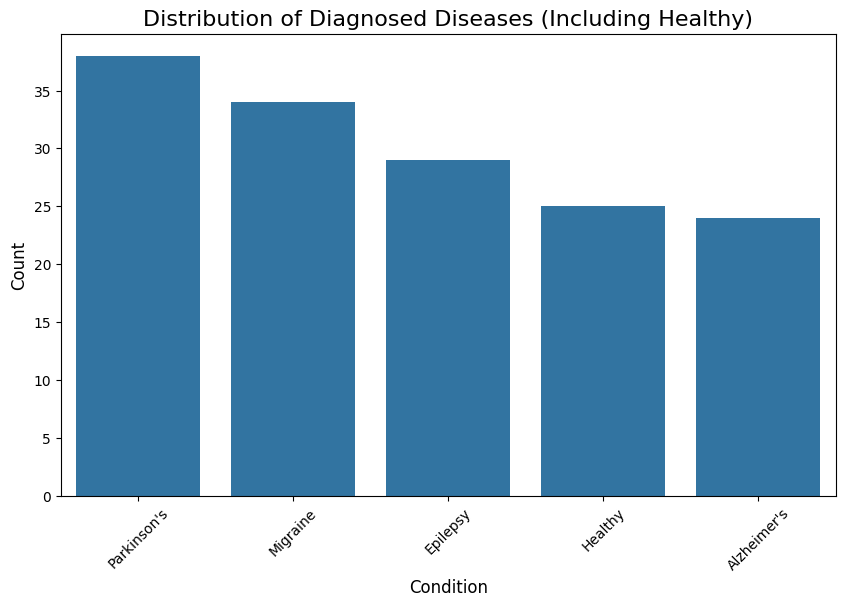

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24584\4202956711.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Predicted_Disease", y="Predicted_Mood", palette="Set2")


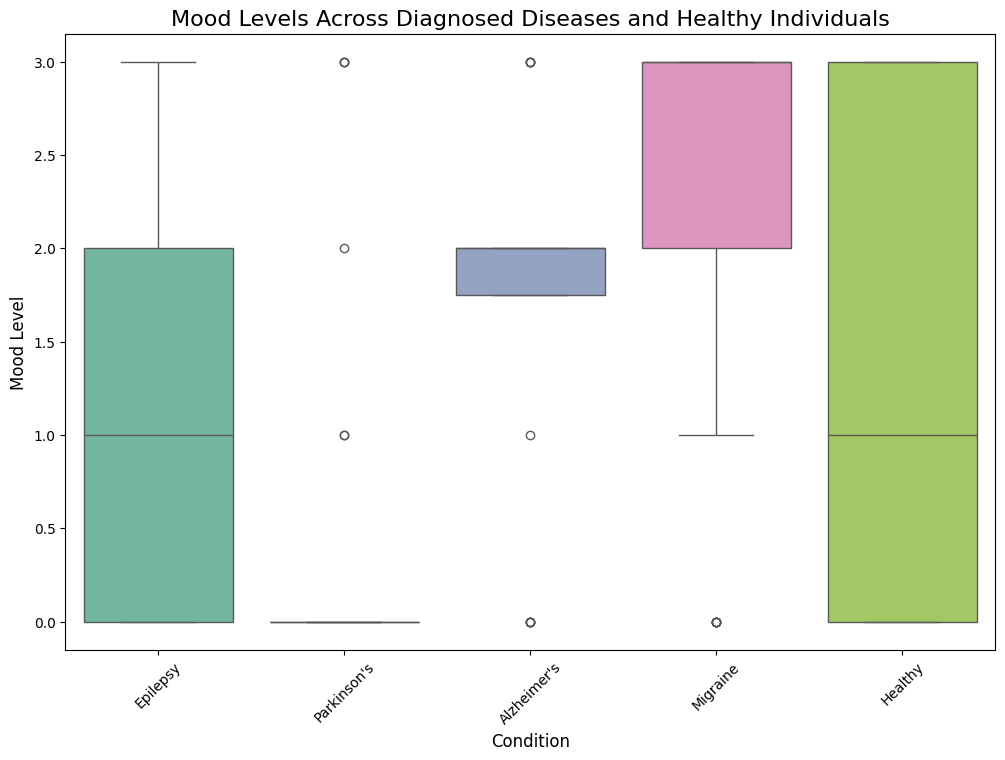

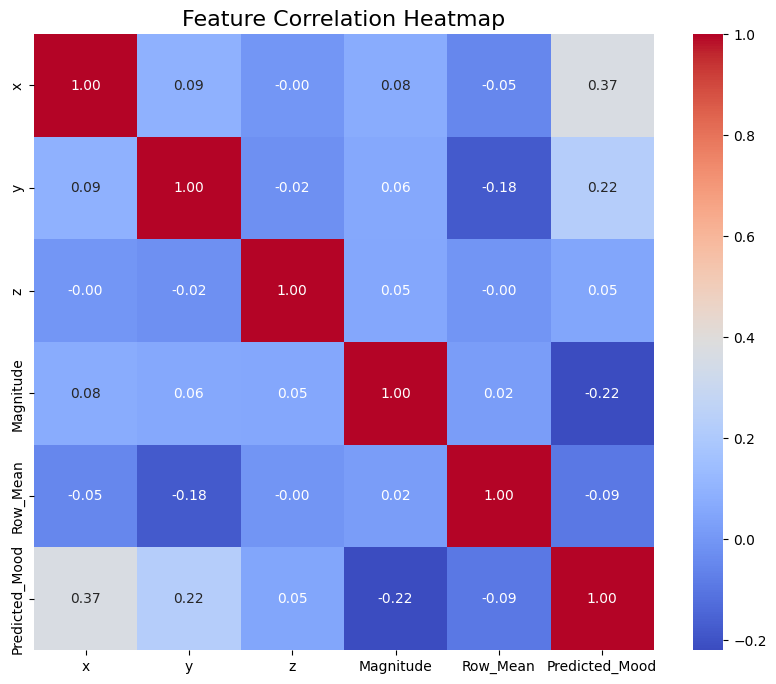

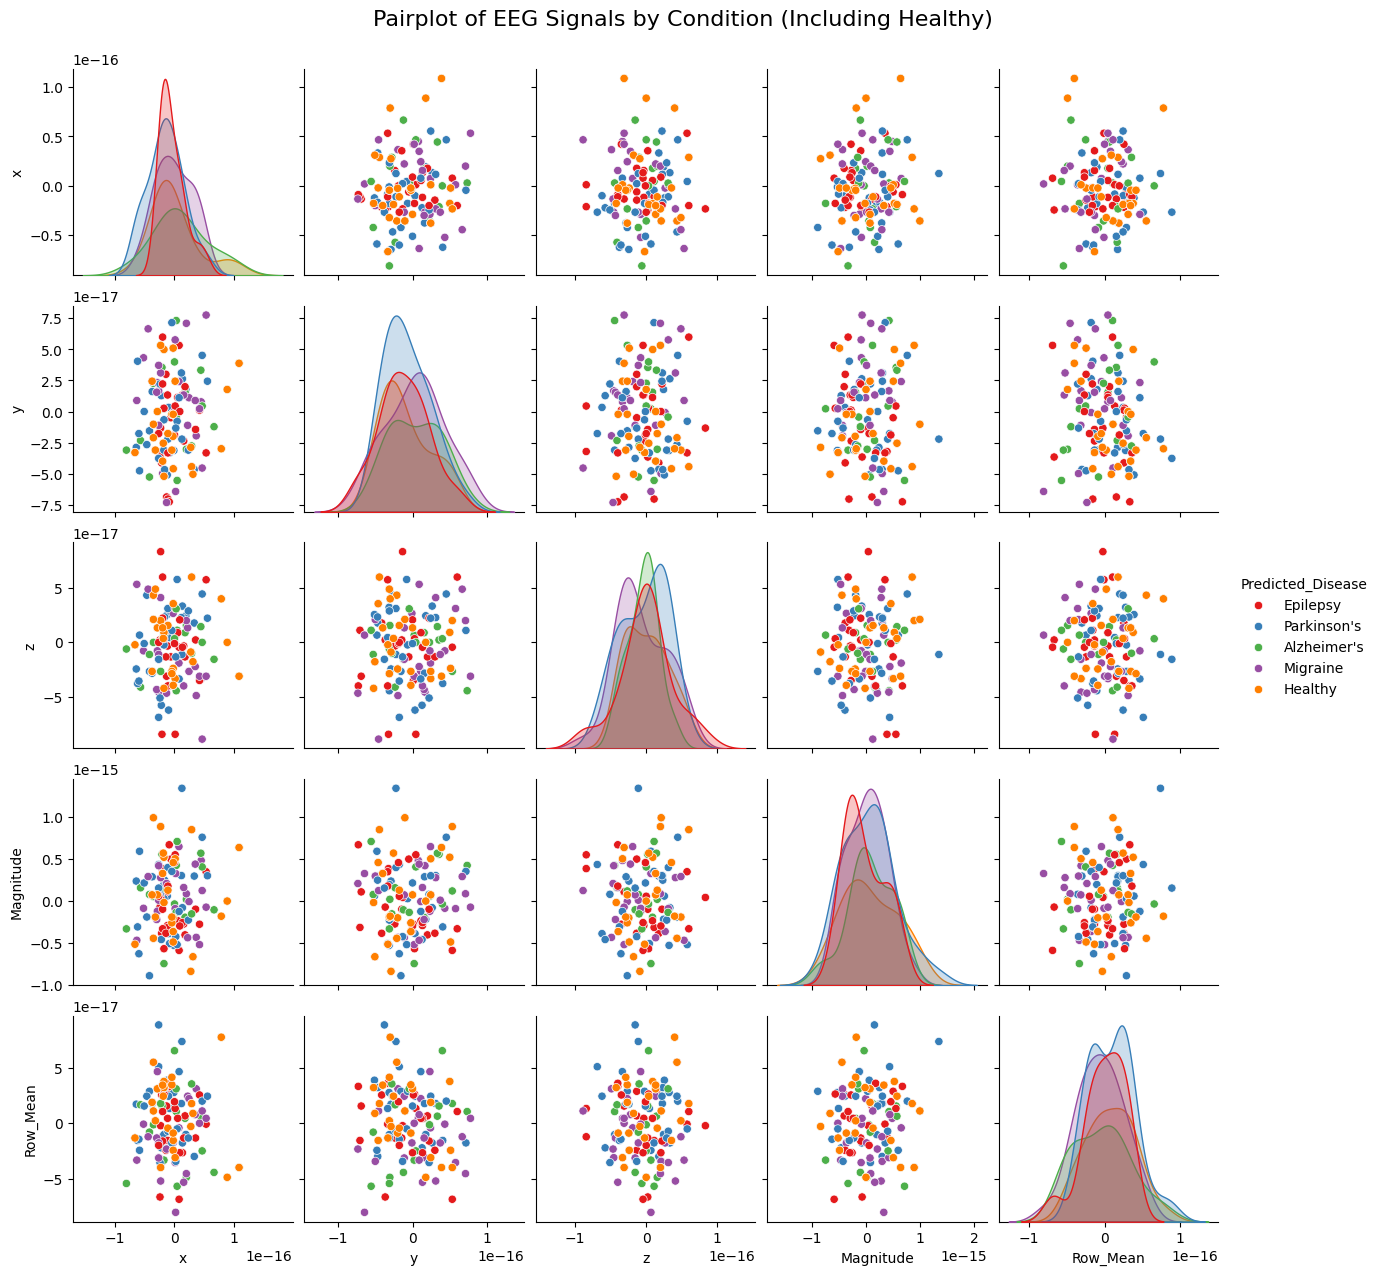

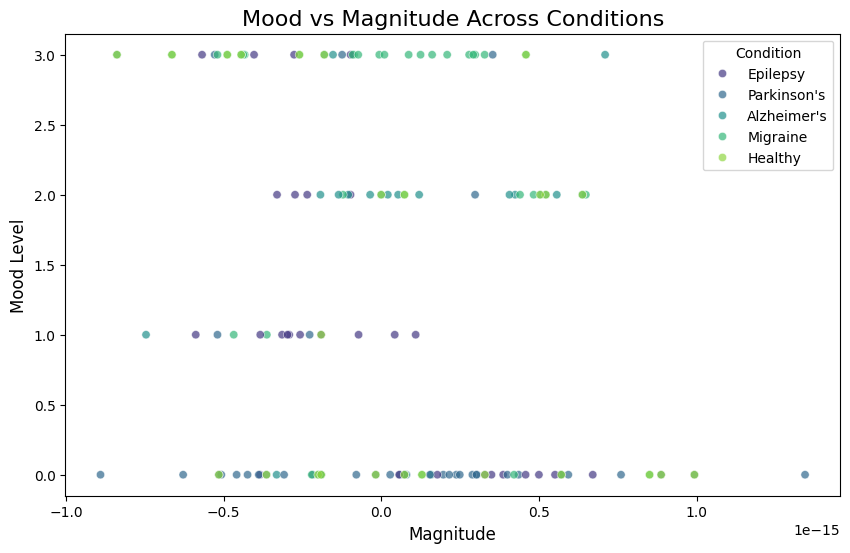

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24584\4202956711.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="Predicted_Disease", y="Row_Mean", palette="muted")


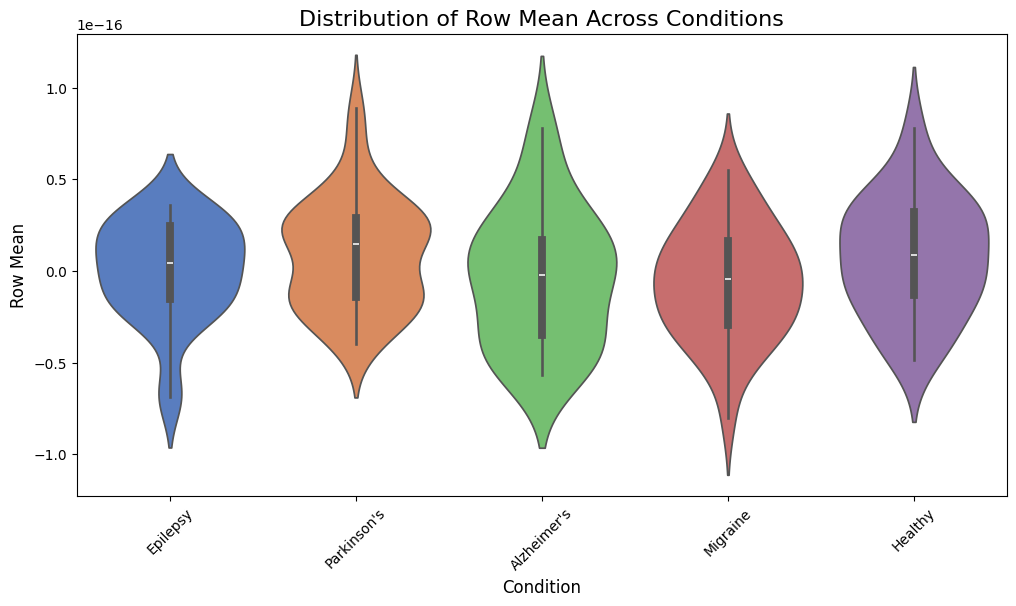

Graphs description saved as 'Graph_Descriptions.csv'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "./EEG_Data_With_Predicted_Disease.csv"
data = pd.read_csv(file_path)

# Check the dataset
print(data.head())

# Ensure 'Healthy' is included in the dataset
if 'Healthy' not in data['Predicted_Disease'].unique():
    print("Adding 'Healthy' category for comparison.")
    healthy_data = data.sample(frac=0.2)  # Sampling some data as healthy
    healthy_data['Predicted_Disease'] = 'Healthy'
    data = pd.concat([data, healthy_data], ignore_index=True)

# Plot 1: Distribution of Diagnosed Diseases Including Healthy
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Predicted_Disease", order=data["Predicted_Disease"].value_counts().index)
plt.title("Distribution of Diagnosed Diseases (Including Healthy)", fontsize=16)
plt.xlabel("Condition", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Plot 2: Mood Levels Across Diagnosed Diseases and Healthy
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x="Predicted_Disease", y="Predicted_Mood", palette="Set2")
plt.title("Mood Levels Across Diagnosed Diseases and Healthy Individuals", fontsize=16)
plt.xlabel("Condition", fontsize=12)
plt.ylabel("Mood Level", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Plot 3: Correlation Heatmap of Features
plt.figure(figsize=(10, 8))
correlation = data[["x", "y", "z", "Magnitude", "Row_Mean", "Predicted_Mood"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

# Plot 4: Pairplot for Features by Disease and Healthy
sns.pairplot(data=data, vars=["x", "y", "z", "Magnitude", "Row_Mean"], hue="Predicted_Disease", palette="Set1")
plt.suptitle("Pairplot of EEG Signals by Condition (Including Healthy)", y=1.02, fontsize=16)
plt.show()

# Plot 5: Mood vs Magnitude for Comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Magnitude", y="Predicted_Mood", hue="Predicted_Disease", palette="viridis", alpha=0.7)
plt.title("Mood vs Magnitude Across Conditions", fontsize=16)
plt.xlabel("Magnitude", fontsize=12)
plt.ylabel("Mood Level", fontsize=12)
plt.legend(title="Condition")
plt.show()

# Plot 6: Comparison of Row Mean Across Conditions
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x="Predicted_Disease", y="Row_Mean", palette="muted")
plt.title("Distribution of Row Mean Across Conditions", fontsize=16)
plt.xlabel("Condition", fontsize=12)
plt.ylabel("Row Mean", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Graphs Description Table
graphs_description = [
    {"Graph": "Distribution of Diagnosed Diseases", "Description": "Shows the count of individuals diagnosed with different conditions, including Healthy."},
    {"Graph": "Mood Levels Across Diagnosed Diseases", "Description": "Boxplot showing variations in mood levels across different conditions."},
    {"Graph": "Feature Correlation Heatmap", "Description": "Displays correlation among features like x, y, z, Magnitude, Row_Mean, and Predicted_Mood."},
    {"Graph": "Pairplot of EEG Signals", "Description": "Visualizes relationships between EEG features by condition."},
    {"Graph": "Mood vs Magnitude", "Description": "Scatterplot showing the relationship between magnitude and mood for each condition."},
    {"Graph": "Row Mean Distribution", "Description": "Violin plot depicting the distribution of row mean values across conditions."},
]

# Save Graphs Description Table as DataFrame
description_df = pd.DataFrame(graphs_description)
description_df.to_csv("./Graph_Descriptions.csv", index=False)

print("Graphs description saved as 'Graph_Descriptions.csv'")